In [1]:
import numpy as np
import mpmath as mp

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from lib.renormalization.clock import *

In [3]:
mp.mp.dps = 30
mp.mp.pretty = True

# Renormalization Group Flow

In [4]:
J = 1
K = 1

clock = ClockRenormalizationGroup(J, K, bondmoving_method='old')

In [6]:
n = 25
T = clock.transfer_matrix
T = clock.renormalize(T, n)
print(T, end='\n\n')

[                                                       1.0   2.67762117024196291906064746858e-268963587387327419035754    7.33495033470469789042409608148e-580738439698741552080142   -7.33495033470469789042409608148e-580738439698741552080142  -2.53465392334374849157666221212e-576620254079938890779756  -1.52443332044997964677802044455e-364633876903792984917657]
[ 2.67762117024196291906064746858e-268963587387327419035754                                                         1.0    7.33495033470469789042409608148e-580738439698741552080142   -7.33495033470469789042409608148e-580738439698741552080142  -1.52443332044997964677802044455e-364633876903792984917657  -2.53465392334374849157666221212e-576620254079938890779756]
[ 7.33495033387085749969995623281e-580738439698741552080142   7.33495033387085749969995623281e-580738439698741552080142   2.15205985625873527027739645507e-1161476879397483104160282  -2.15205985625873527027739645507e-1161476879397483104160282  -7.3349503338708574996999562328

# Calculate Phase Diagram

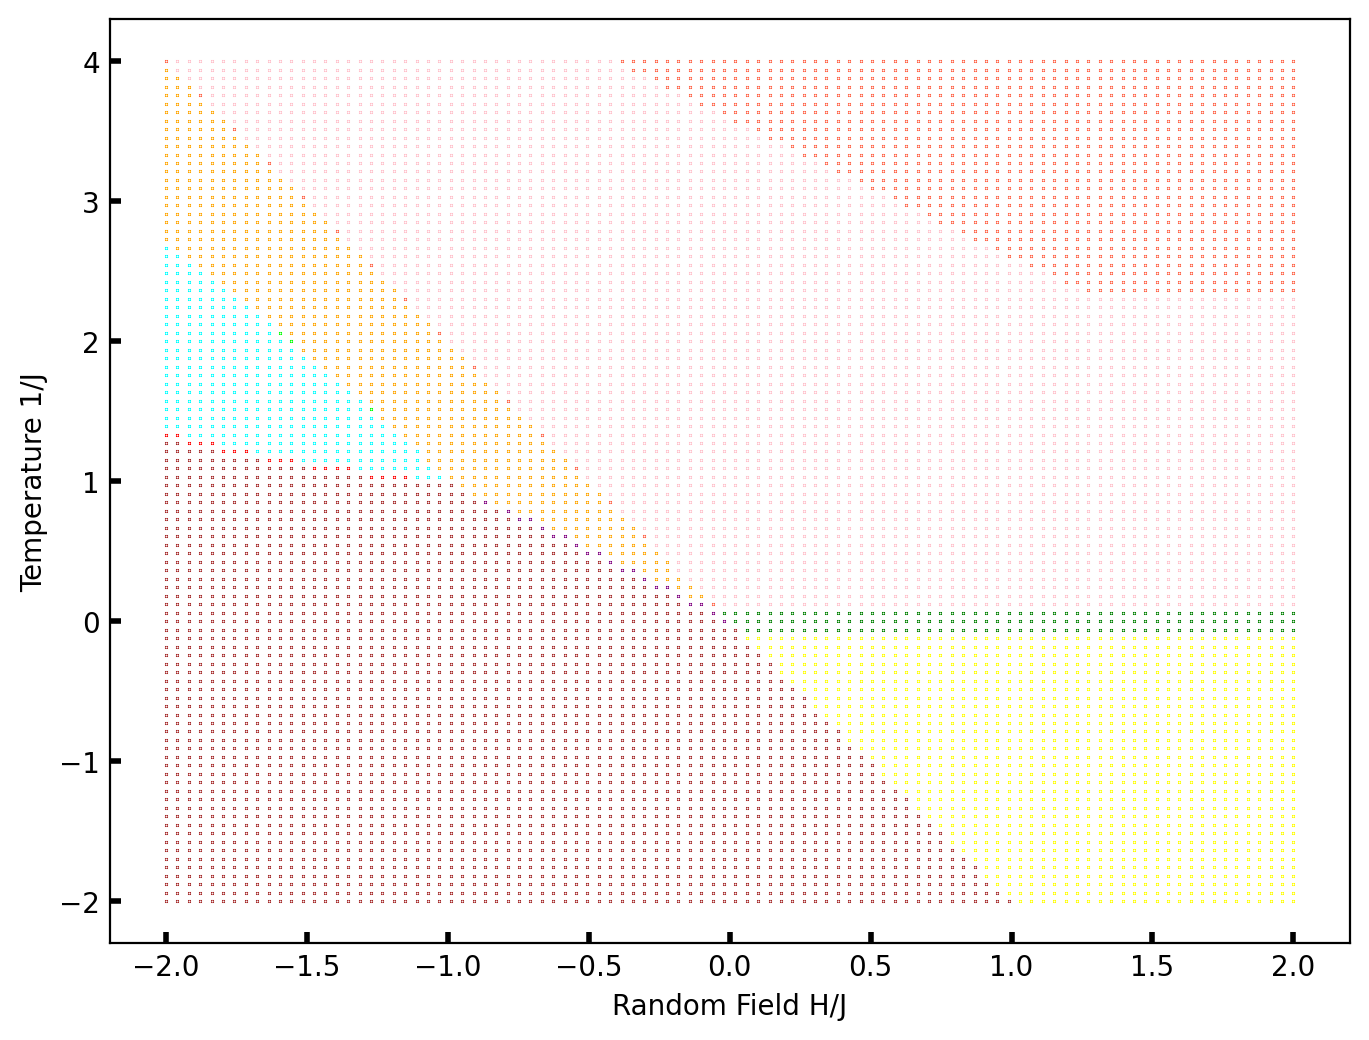

CPU times: user 2min 9s, sys: 761 ms, total: 2min 10s
Wall time: 2min 11s


In [7]:
%%time

n = 100
J_values = np.linspace(start=-2, stop=2, num=n)
K_values = np.linspace(start=-2, stop=4, num=n)

D, OA, OB, OC, OD, OE, OF, OG, OH, OI, OJ, OK, OL, OM, X, XX = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

for i, J in enumerate(J_values):
    for K in K_values:

        clock = ClockRenormalizationGroup(J, K, bondmoving_method='old')
        t = clock.transfer_matrix
        _, phase = clock.phase(t, 40)

        if phase == "D":
            D.append([J, K])

        elif phase == "OA":
            OA.append([J, K])

        elif phase == "OB":
            OB.append([J, K])
            
        elif phase == "OC":
            OC.append([J, K])
            
        elif phase == "OD":
            OD.append([J, K])
            
        elif phase == "OE":
            OE.append([J, K])
            
        elif phase == "OF":
            OF.append([J, K])
            
        elif phase == "OG":
            OG.append([J, K])
            
        elif phase == "OH":
            OH.append([J, K])
            
        elif phase == "OI":
            OI.append([J, K])
            
        elif phase == "OJ":
            OJ.append([J, K])
            
        elif phase == "OK":
            OK.append([J, K])
            
        elif phase == "OL":
            OL.append([J, K])
            
        elif phase == "OM":
            OM.append([J, K])
        
        elif phase == "X":
            X.append([J, K])
            
        else: # ?
            XX.append([J, K])
            
        print("J = %.3f; K = %.3f; Phase: %s" % (J, K, phase), end='')
        print("\t\t\t", end='\r')

#notify(job)

c = {"D":"grey",
     "OA":"blue",
     "OB":"tomato",
     "OC":"brown",
     "OD":"yellow",
     "OE":"pink",
     "OF":"magenta",
     "OG":"cyan",
     "OH":"purple",
     "OI":"orange",
     "OJ":"red",
     "OK":"lime",
     "OL":"green",
     "OM":"olive",
     "X":"black",
     "XX":"black"}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)
fig.set_facecolor("white")
plt.rc(group="font", family="monospace", weight="bold", size=10)
plt.rc(group="lines", linewidth=1)
plt.rc(group="axes", linewidth=2)

ms = .1
if D: ax.plot(np.array(D)[:,0], np.array(D)[:,1], ls="", marker="s", mfc=c["D"], mec=c["D"], ms=ms, alpha=1)
if OA:   ax.plot(np.array(OA)[:,0], np.array(OA)[:,1], ls="", marker="s", mfc=c["OA"], mec=c["OA"], ms=ms, alpha=1)
if OB:   ax.plot(np.array(OB)[:,0], np.array(OB)[:,1], ls="", marker="s", mfc=c["OB"], mec=c["OB"], ms=ms, alpha=1)
if OC:   ax.plot(np.array(OC)[:,0], np.array(OC)[:,1], ls="", marker="s", mfc=c["OC"], mec=c["OC"], ms=ms, alpha=1)
if OD:   ax.plot(np.array(OD)[:,0], np.array(OD)[:,1], ls="", marker="s", mfc=c["OD"], mec=c["OD"], ms=ms, alpha=1)
if OE:   ax.plot(np.array(OE)[:,0], np.array(OE)[:,1], ls="", marker="s", mfc=c["OE"], mec=c["OE"], ms=ms, alpha=1)
if OF:   ax.plot(np.array(OF)[:,0], np.array(OF)[:,1], ls="", marker="s", mfc=c["OF"], mec=c["OF"], ms=ms, alpha=1)
if OG:   ax.plot(np.array(OG)[:,0], np.array(OG)[:,1], ls="", marker="s", mfc=c["OG"], mec=c["OG"], ms=ms, alpha=1)
if OH:   ax.plot(np.array(OH)[:,0], np.array(OH)[:,1], ls="", marker="s", mfc=c["OH"], mec=c["OH"], ms=ms, alpha=1)
if OI:   ax.plot(np.array(OI)[:,0], np.array(OI)[:,1], ls="", marker="s", mfc=c["OI"], mec=c["OI"], ms=ms, alpha=1)
if OJ:   ax.plot(np.array(OJ)[:,0], np.array(OJ)[:,1], ls="", marker="s", mfc=c["OJ"], mec=c["OJ"], ms=ms, alpha=1)
if OK:   ax.plot(np.array(OK)[:,0], np.array(OK)[:,1], ls="", marker="s", mfc=c["OK"], mec=c["OK"], ms=ms, alpha=1)
if OL:   ax.plot(np.array(OL)[:,0], np.array(OL)[:,1], ls="", marker="s", mfc=c["OL"], mec=c["OL"], ms=ms, alpha=1)
if OM:   ax.plot(np.array(OM)[:,0], np.array(OM)[:,1], ls="", marker="s", mfc=c["OM"], mec=c["OM"], ms=ms, alpha=1)
if X:    ax.plot(np.array(X)[:,0], np.array(X)[:,1], ls="", marker="s", mfc=c["X"], mec=c["X"], ms=ms, alpha=1)
if XX:    ax.plot(np.array(XX)[:,0], np.array(XX)[:,1], ls="", marker="s", mfc=c["XX"], mec=c["XX"], ms=ms, alpha=1)

#ax.axis([-2,2, -2,2])
ax.set_xlabel("Random Field H/J")
ax.set_ylabel("Temperature 1/J")  
ax.tick_params(axis="both", direction="in", width=2, length=4)
plt.show()